<a href="https://colab.research.google.com/github/charlielu05/kalman_filter/blob/master/KF_Tutorial_Exercise_1_(28_01_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bayes Theorem Example IIa from Introduction to to Estimation and Data Fusion, H.Durrant-Whyte Slide 17

A single state x which can take on one of three values: \
$x_{1}$: x is a type 1 target \
$x_{2}$: x is a type 2 target \
$x_{3}$: No visible target

Single sensor observes $x$ and returns three possible values: \
$z_{1}$: Observation of a type 1 target \
$z_{2}$: Observation of a type 2 target \
$z_{3}$: No target observed

The sensor model is described by the likelihood matrix $P_{1}(z|x)$: \
 ~     | z1  |  z2  |  z3 
---    |-----|------|-----
$x_{1}$| 0.45| 0.45 | 0.1 
$x_{2}$| 0.45| 0.45 | 0.1 
$x_{3}$| 0.15| 0.15 | 0.7 

Likelihood matrix is a function of both $x$ and $z$
For a fixed state ($x$), it describes the probability of a particular observation being made (rows of the matrix, $z_{1}$...$z_{3}$)
For an observation it describes a probability distribution over the values of true state (the columns, $x_{1}$...$x_{3}$) and is then the Likelihood Function.

The posterior distribution of the true state $x$ after making an observation $z=_z{i}$ is given by $P(x|z_{i})=\alpha P_{1}(z_{i}|x)P(x)$ \
$\alpha$ is the normalizing constant so that sum, over $x$ of posteriors is 1 \
Assume our prior on $x$ is non-informative so that the true state is equally likely for all three states. $P(x)=(0.33,0.33,0.33)$ \
So probability of $x_{1}$=33%, $x_{2}$=33%, $x_{3}$=33% \
Our likelihood function for $z$=$z_{1}$, $P(z_{1}|x)$=(0.45,0.45,0.15) \

In [ ]:
import numpy as np

In [ ]:
likelihood_matrix = np.array([[.45,.45,.1],
                              [.45,.45,.1],
                              [.15,.15,.7]])

In [ ]:
likelihood_matrix

array([[0.45, 0.45, 0.1 ],
       [0.45, 0.45, 0.1 ],
       [0.15, 0.15, 0.7 ]])

In [ ]:
p_z1 = likelihood_matrix[:,0]

In [ ]:
prior = np.array([0.33,0.33,0.33])

In [ ]:
prior

array([0.33, 0.33, 0.33])

In [ ]:
alpha = np.sum(p_z1 * prior)

First observation of $z$=$z_{1}$

In [ ]:
posterior = 1/alpha * (likelihood * prior)

In [ ]:
posterior

array([0.42857143, 0.42857143, 0.14285714])

Second observation of $z$=$z_{1}$ \
Remember the posterior from the first observation is now the prior for the second observation.

In [ ]:
prior = posterior 

In [ ]:
prior

array([0.42857143, 0.42857143, 0.14285714])

In [ ]:
alpha = np.sum(p_z1 * prior)

In [ ]:
alpha

0.40714285714285714

In [ ]:
posterior = 1/alpha * (likelihood * prior)
posterior

array([0.47368421, 0.47368421, 0.05263158])

---


### Effect of prior 

Define a function that takes a prior and number of z_1 observations as input and calculates posterior

In [ ]:
def repeat_obs(likelihood: np.array, prior:np.array, observations: int)-> np.array:
  for _ in range(observations):
    alpha = np.sum(likelihood * prior)
    posterior = 1/alpha * (likelihood * prior)
    prior = posterior
  return posterior 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
uniform_prior = np.array([.33,.33,.33])
z1_bias_prior = np.array([.8,.15,.05])
z3_bias_prior = np.array([.1, .1, .8])

In [ ]:
z_values = ['z1','z2','z3']

**Uniform prior**

In [ ]:
plt.bar(z_values, uniform_prior)

In [120]:
uniform_posterior = repeat_obs(p_z1, uniform_prior, 2)

<BarContainer object of 3 artists>

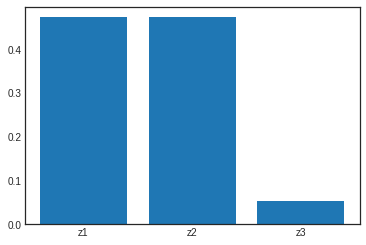

In [121]:
plt.bar(z_values, uniform_posterior)

**z3 biased prior**

In [113]:
z3_bias_posterior = repeat_obs(p_z1, z3_bias_prior, 2)

<BarContainer object of 3 artists>

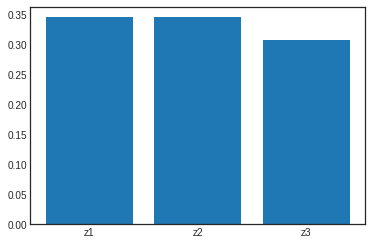

In [119]:
plt.bar(z_values, z3_bias_posterior)

In [ ]:
plt.bar(z_values, z3_bias_prior)